In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('wine_data.csv', header = None, usecols = [0,1,2])
df.columns = ['Class label', 'Alchohol', 'Malik acid']

In [10]:
df

,Class label,Alchohol,Malik acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alchohol', ylabel='Density'>

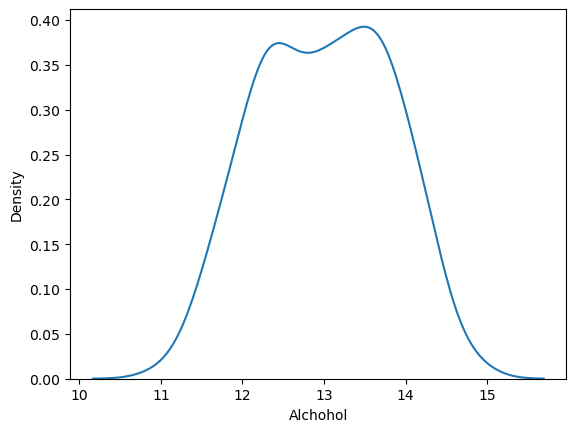

In [11]:
sns.kdeplot(df['Alchohol'])

<Axes: xlabel='Alchohol', ylabel='Malik acid'>

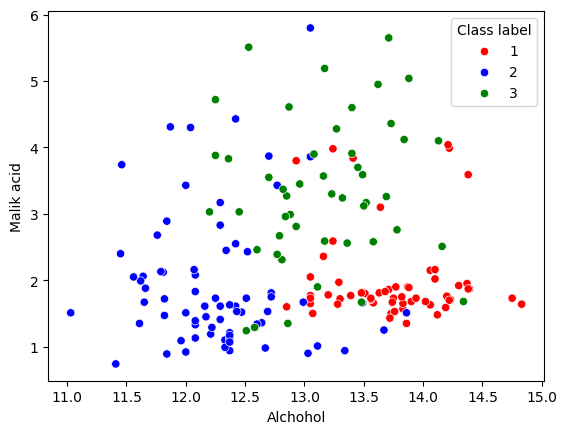

In [15]:
color_dict = {1 : 'red', 3 : 'green', 2 : 'blue'}
sns.scatterplot(x = df['Alchohol'], y = df['Malik acid'], hue = df['Class label'], palette = color_dict)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Class label', axis = 1),df['Class label'],test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

#transform the train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [26]:
np.round(X_train.describe(),1)

,Alchohol,Malik acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [27]:
np.round(X_train_scaled.describe(), 1)

,Alchohol,Malik acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


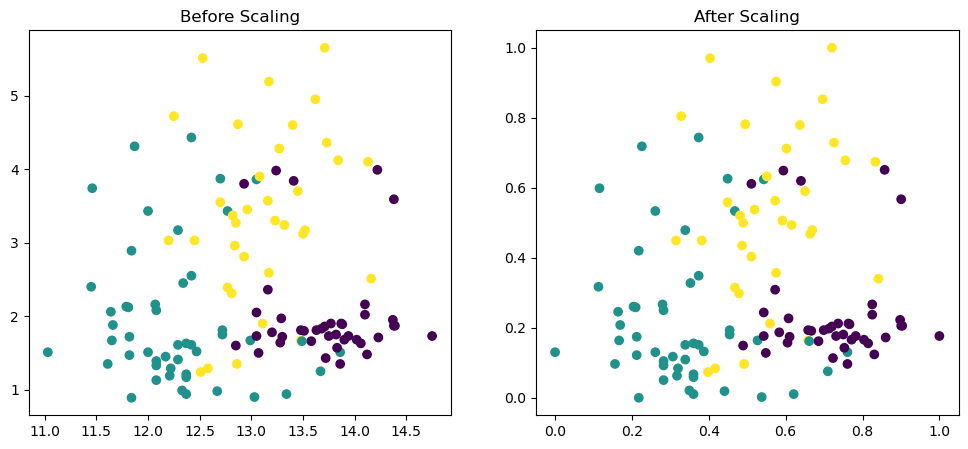

In [37]:
fig,  (ax1, ax2) = plt.subplots(ncols = 2, figsize=(12, 5))

ax1.scatter(X_train['Alchohol'], X_train['Malik acid'], c = Y_train)
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Alchohol'], X_train_scaled['Malik acid'], c = Y_train)
ax2.set_title('After Scaling')
plt.show()

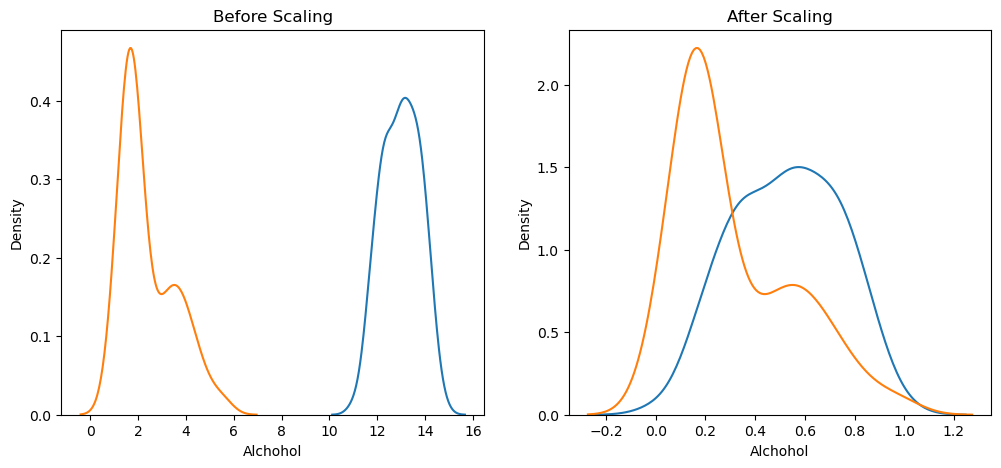

In [39]:
fig,  (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# Before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alchohol'], ax = ax1)
sns.kdeplot(X_train['Malik acid'], ax = ax1)

# After Scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alchohol'], ax = ax2)
sns.kdeplot(X_train_scaled['Malik acid'], ax = ax2)
plt.show()

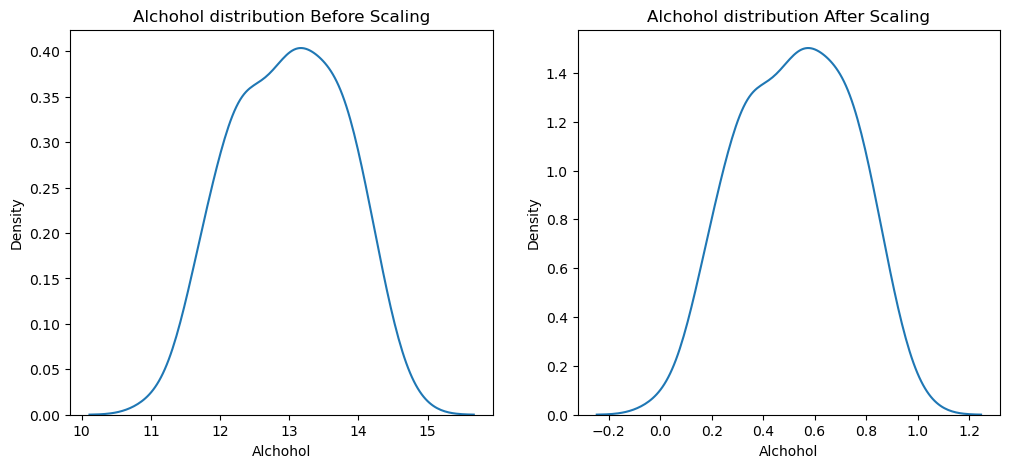

In [41]:
fig,  (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# Before Scaling
ax1.set_title('Alchohol distribution Before Scaling')
sns.kdeplot(X_train['Alchohol'], ax = ax1)

# After Scaling
ax2.set_title('Alchohol distribution After Scaling')
sns.kdeplot(X_train_scaled['Alchohol'], ax = ax2)
plt.show()

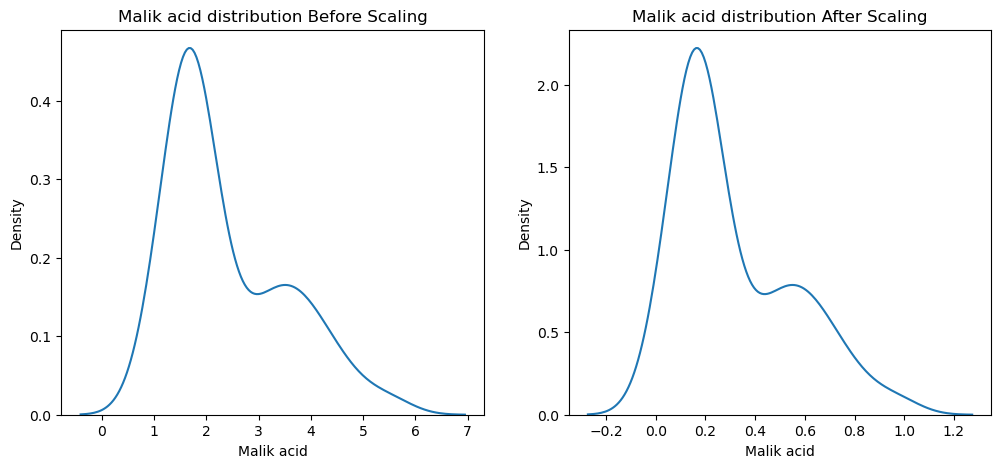

In [42]:
fig,  (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# Before Scaling
ax1.set_title('Malik acid distribution Before Scaling')
sns.kdeplot(X_train['Malik acid'], ax = ax1)

# After Scaling
ax2.set_title('Malik acid distribution After Scaling')
sns.kdeplot(X_train_scaled['Malik acid'], ax = ax2)
plt.show()